In [1]:
%run /Users/denis/Documents/Projects/scripts/init.ipy
os.chdir(os.getcwd().replace('/pipeline/notebooks', ''));

In [2]:
infiles = ('./s1-normalized.dir/correlation.feather', './s1-normalized.dir/zscore.feather', './s1-normalized.dir/generif_overlap_zscore.feather', './s1-normalized.dir/autorif_overlap_zscore.feather')

In [14]:
matrix_genes = {os.path.basename(x)[:-len('.feather')]: set(pd.read_feather(x).set_index('gene_symbol').index) for x in infiles}

/Users/denis/anaconda3/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning:

`nthreads` argument is deprecated, pass `use_threads` instead



In [7]:
def readGMT(infile):
    gmt = {}
    with open(infile) as openfile:
        for line in openfile.read().split('\n'):
            split_line = line.strip().split('\t')
            if split_line[0]:
                gmt[split_line[0]] = [x.split(',')[0] for x in split_line[2:]]
    return gmt


In [22]:
# Read GMT
libraries = {os.path.basename(x)[:-len('.txt')]: readGMT(x) for x in glob.glob('libraries.dir/*.txt')}

In [9]:
from matplotlib_venn import venn3

In [12]:
list(matrix_genes.keys())

['correlation', 'zscore', 'generif_overlap_zscore', 'autorif_overlap_zscore']

## 1. Across similiarities

In [16]:
from itertools import combinations

In [19]:
[x for x in combinations(matrix_genes.keys(), 3)]

[('correlation', 'zscore', 'generif_overlap_zscore'),
 ('correlation', 'zscore', 'autorif_overlap_zscore'),
 ('correlation', 'generif_overlap_zscore', 'autorif_overlap_zscore'),
 ('zscore', 'generif_overlap_zscore', 'autorif_overlap_zscore')]

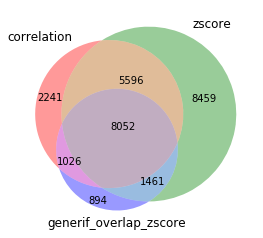

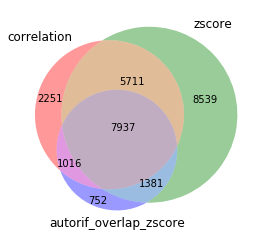

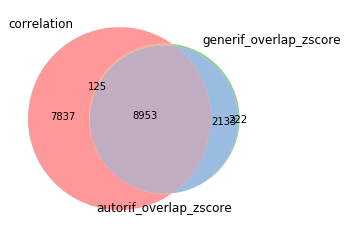

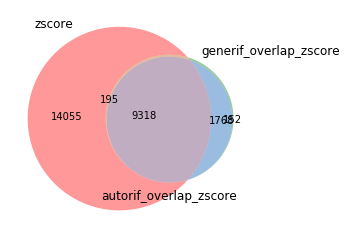

In [21]:
for gmts in combinations(matrix_genes.keys(), 3):
    plt.figure();
    venn3([matrix_genes[x] for x in gmts], gmts);

## 2. Genes represented by similarities

In [33]:
counts = pd.Series({index: len(value) for index, value in libraries_merged.items()}).rename('genes').to_frame().rename_axis('library').reset_index()
counts.head()

library  genes
0  GO_Molecular_Function_2018  11459
1            ARCHS4_TFs_Coexp  25983
2               Reactome_2016   8973
3        ARCHS4_Kinases_Coexp  19612
4                   KEGG_2016   7010

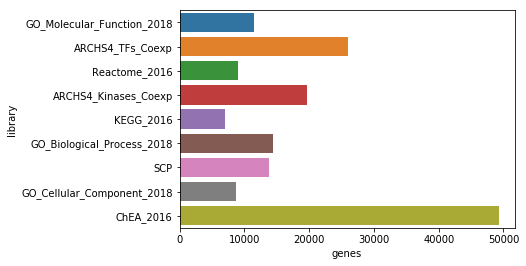

In [35]:
sns.barplot('genes', 'library', data=counts);

In [28]:
libraries_merged = {library_name: set([gene for term_genes in gmt.values() for gene in term_genes]) for library_name, gmt in libraries.items()}

/Users/denis/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



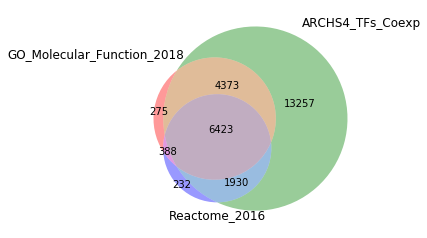

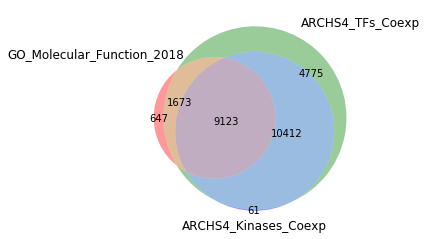

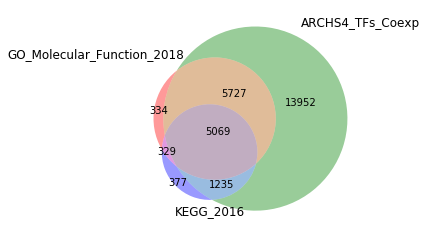

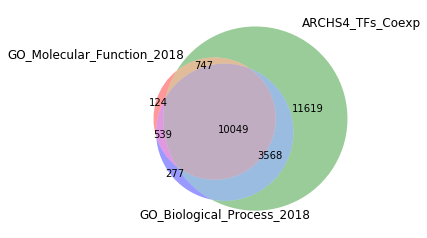

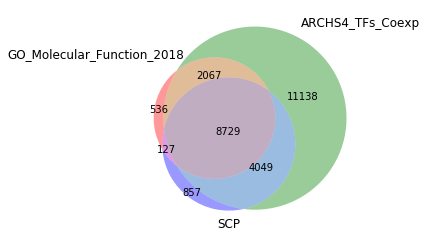

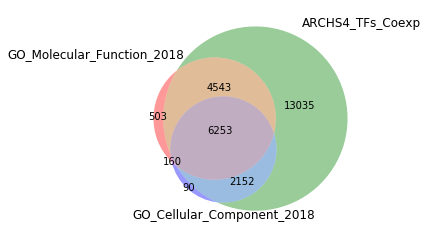

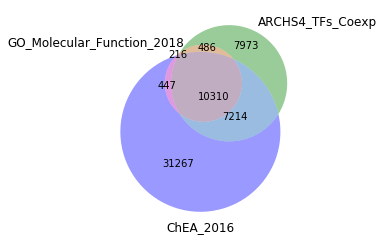

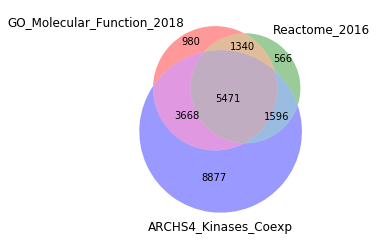

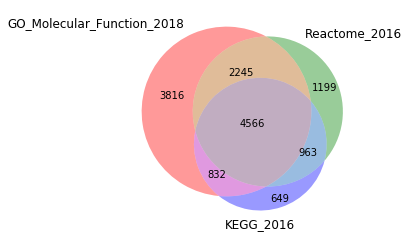

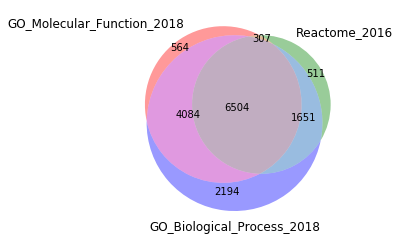

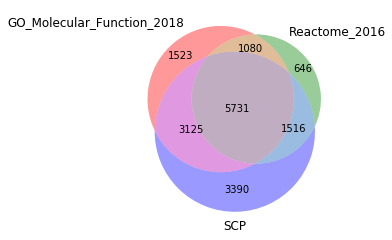

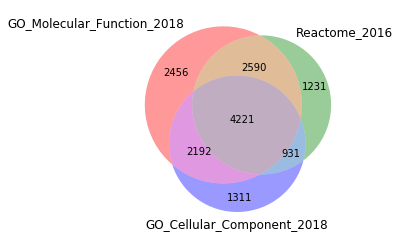

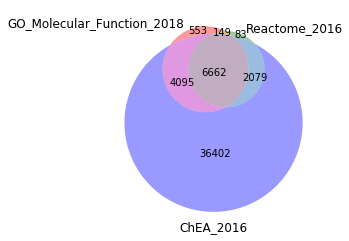

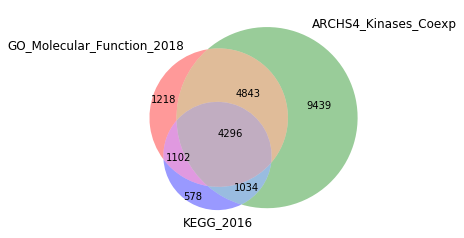

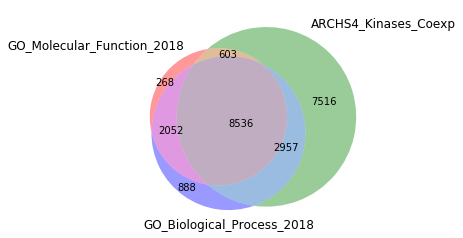

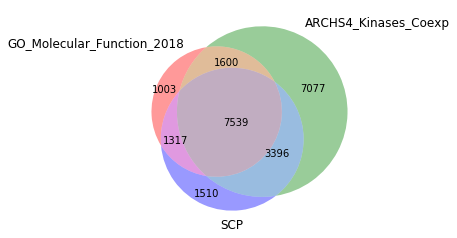

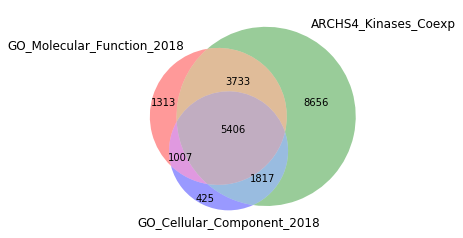

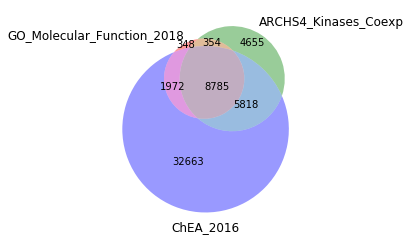

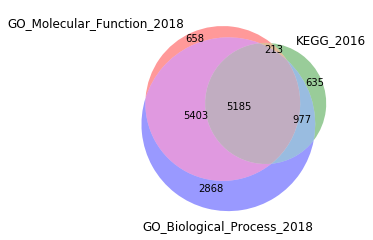

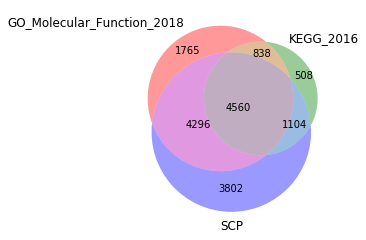

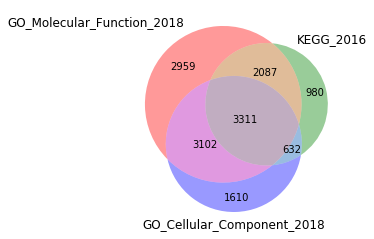

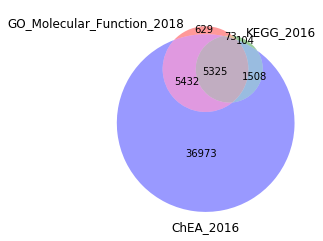

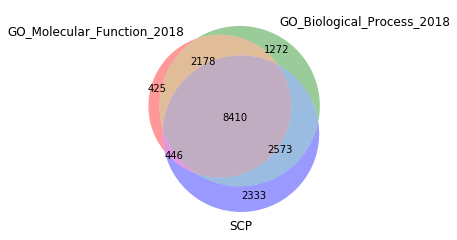

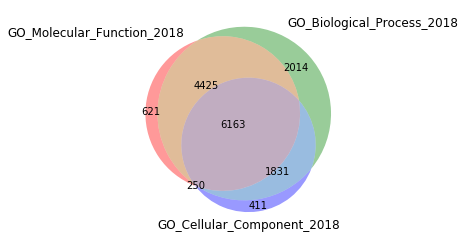

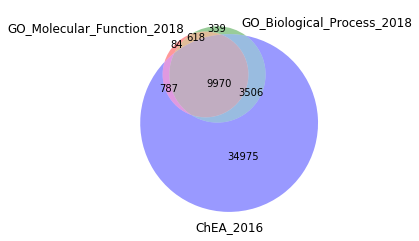

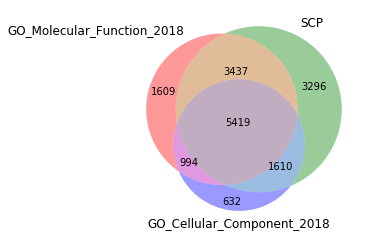

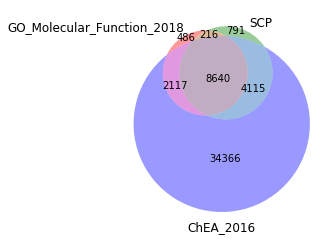

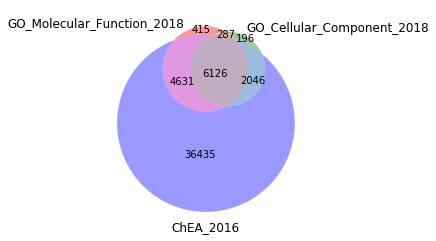

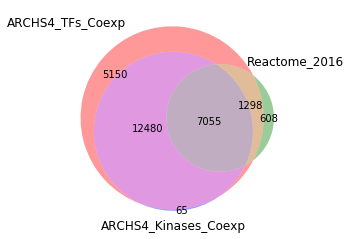

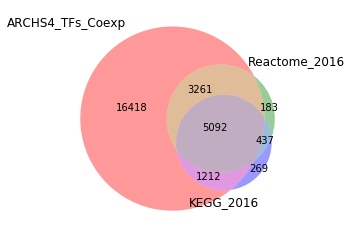

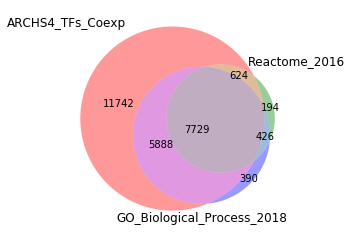

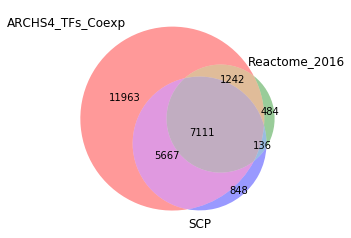

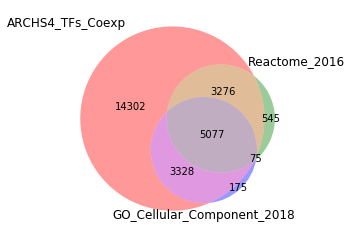

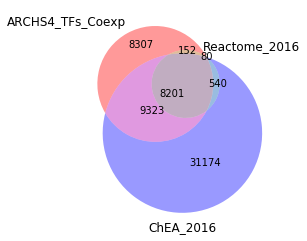

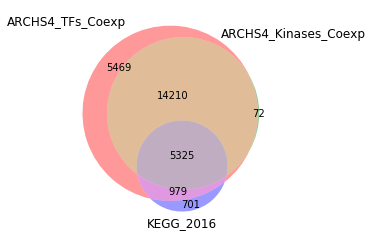

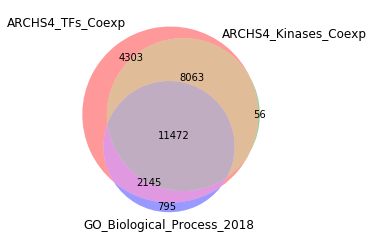

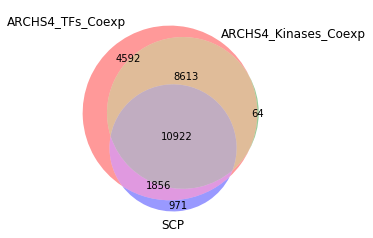

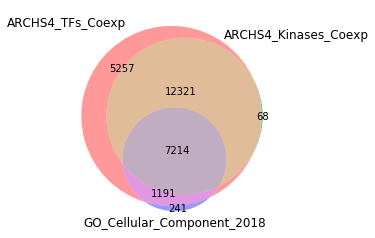

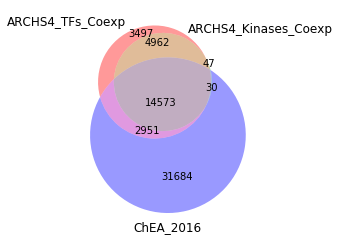

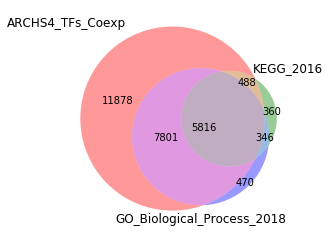

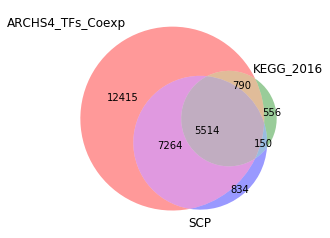

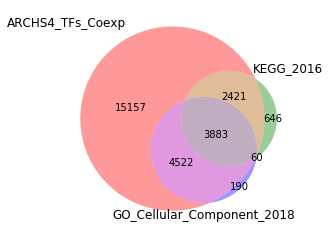

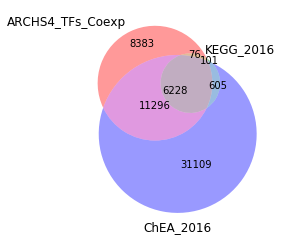

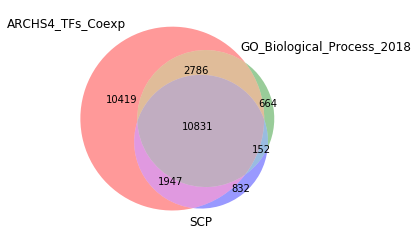

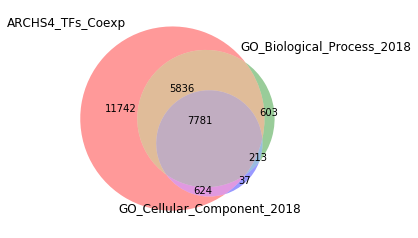

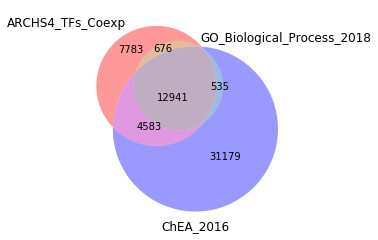

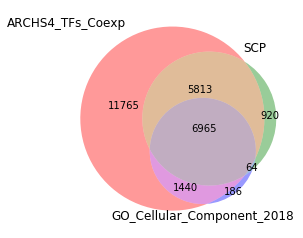

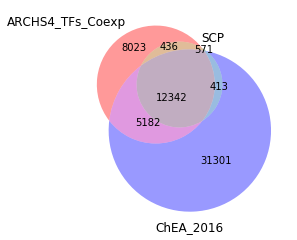

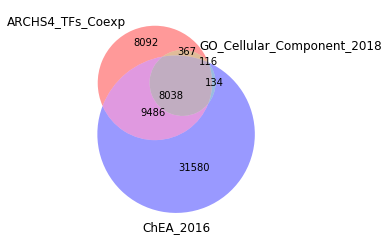

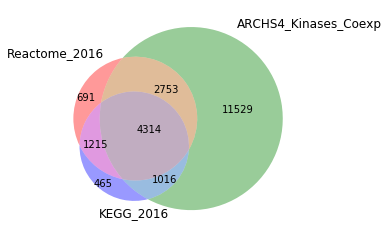

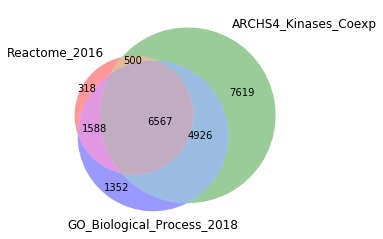

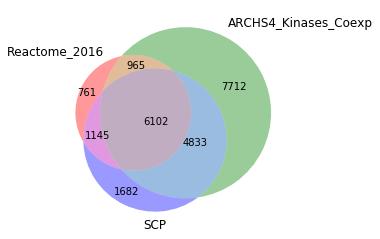

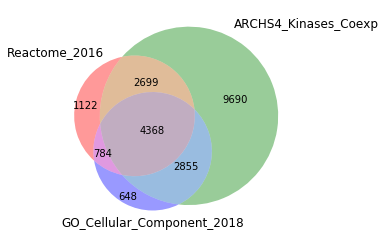

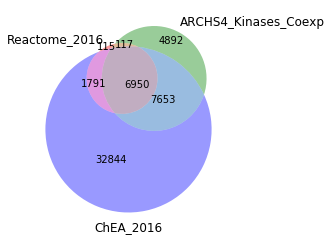

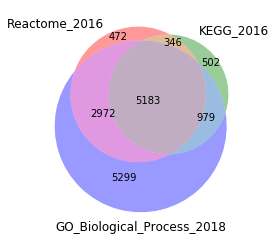

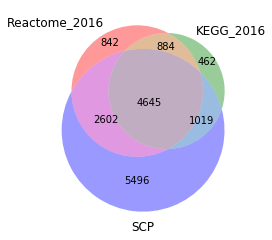

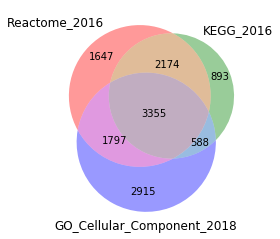

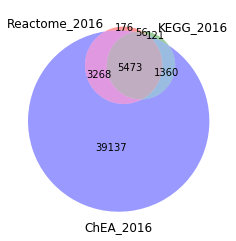

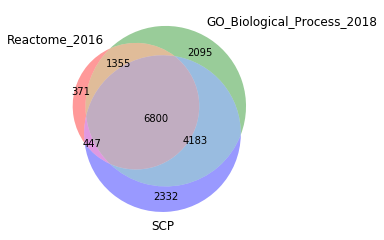

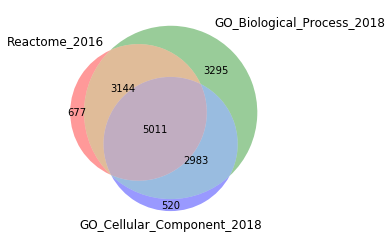

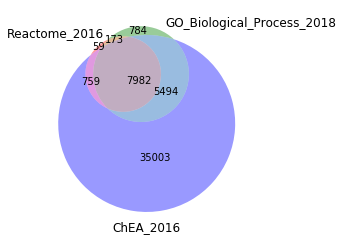

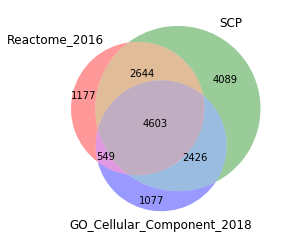

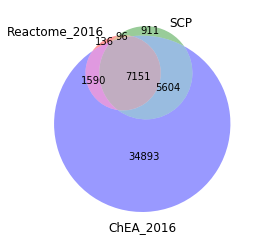

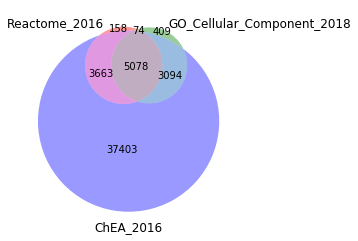

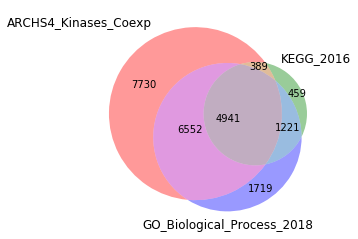

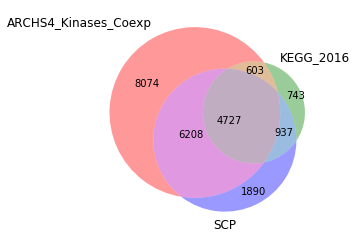

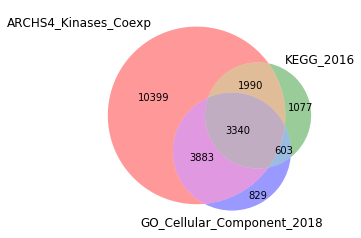

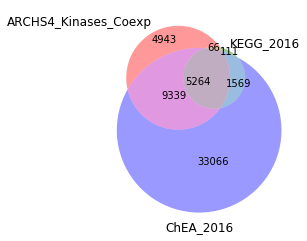

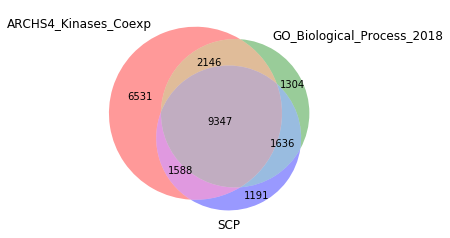

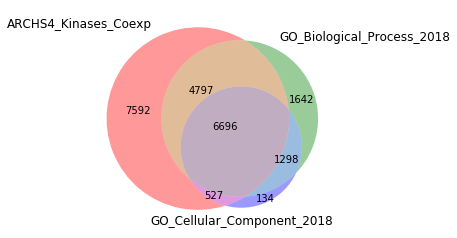

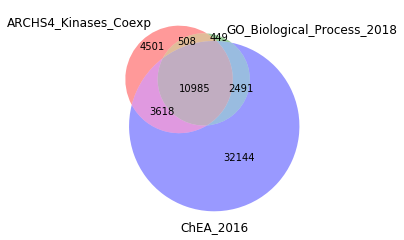

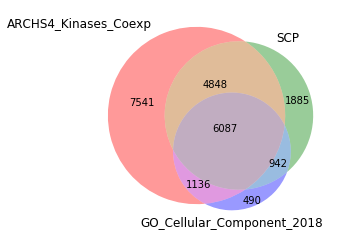

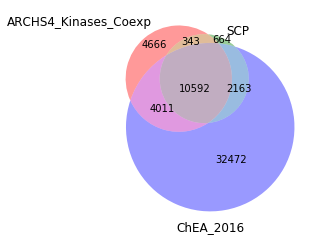

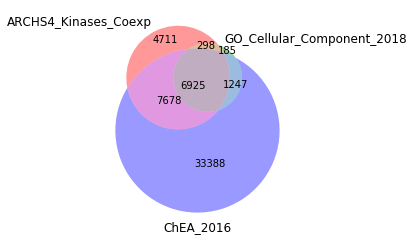

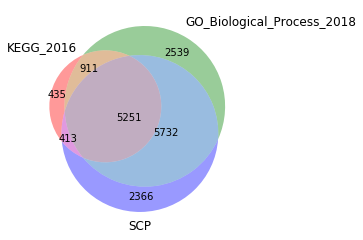

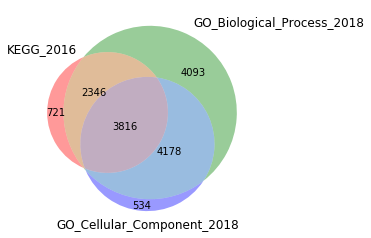

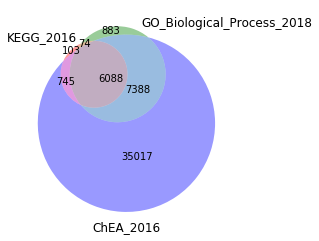

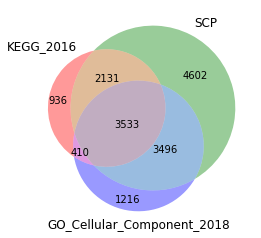

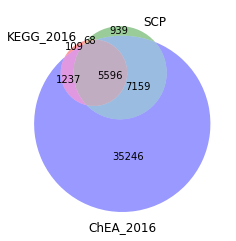

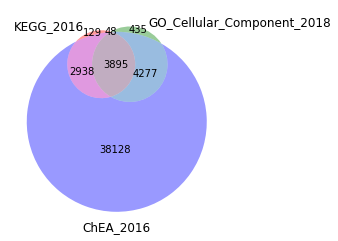

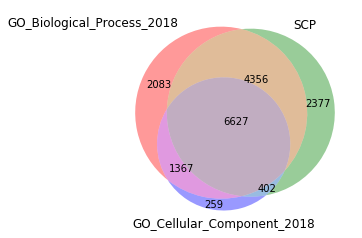

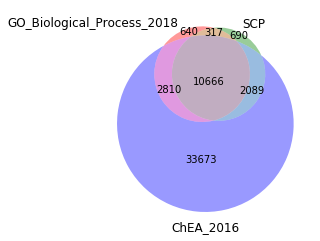

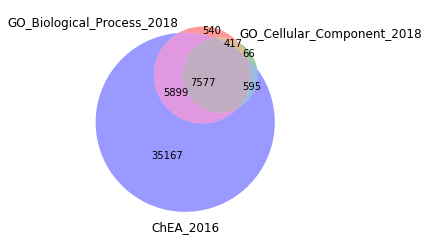

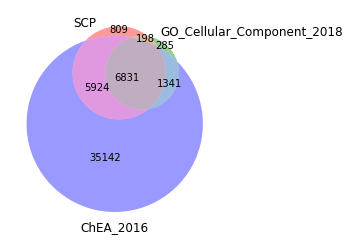

In [29]:
for gmts in combinations(libraries_merged.keys(), 3):
    plt.figure();
    venn3([libraries_merged[x] for x in gmts], gmts);

## 3. Genes represented by GMTs

In [36]:
results = {x: {} for x in matrix_genes.keys()}
for matrix_name, matrix_set in matrix_genes.items():
    for library_name, library_set in libraries_merged.items():
        results[matrix_name][library_name] = len(matrix_set.intersection(library_set))

In [37]:
result_dataframe = pd.DataFrame(results)
result_dataframe.head()

correlation  zscore  generif_overlap_zscore  \
ARCHS4_Kinases_Coexp              14167   13666                    9006   
ARCHS4_TFs_Coexp                  16833   16611                   10529   
ChEA_2016                         14764   16371                   10791   
GO_Biological_Process_2018        11784   12247                    8981   
GO_Cellular_Component_2018         7579    7533                    5698   

                            autorif_overlap_zscore  
ARCHS4_Kinases_Coexp                          8875  
ARCHS4_TFs_Coexp                             10358  
ChEA_2016                                    10586  
GO_Biological_Process_2018                    8886  
GO_Cellular_Component_2018                    5648